In [5]:
import torch
import numpy as np
from model import *
from train import *
from dataset import *

device=torch.device('cuda')

E:\Hafier\course\Statistical learning\ass\code\dataset.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataBinary=np.array(data)


Train Epoch: 1 cost time: 0.166 train_loss 14.199 accuracy 56.60%
Epoch: 1 cost time: 0.0457 test_loss 3.3537 test accuracy 45.71%
 
Train Epoch: 2 cost time: 0.105 train_loss 2.238 accuracy 61.15%
Epoch: 2 cost time: 0.0212 test_loss 5.9141 test accuracy 26.86%
 
Train Epoch: 3 cost time: 0.105 train_loss 2.866 accuracy 59.85%
Epoch: 3 cost time: 0.0219 test_loss 2.2050 test accuracy 73.66%
 
Train Epoch: 4 cost time: 0.091 train_loss 2.858 accuracy 60.44%
Epoch: 4 cost time: 0.0210 test_loss 7.8619 test accuracy 28.07%
 
Train Epoch: 5 cost time: 0.100 train_loss 2.493 accuracy 62.51%
Epoch: 5 cost time: 0.0201 test_loss 8.6959 test accuracy 25.59%
 
Train Epoch: 6 cost time: 0.090 train_loss 3.221 accuracy 61.96%
Epoch: 6 cost time: 0.0213 test_loss 1.8798 test accuracy 67.15%
 
Train Epoch: 7 cost time: 0.101 train_loss 3.845 accuracy 60.44%
Epoch: 7 cost time: 0.0881 test_loss 3.0887 test accuracy 71.76%
 
Train Epoch: 8 cost time: 0.139 train_loss 3.697 accuracy 60.52%
Epoch: 8 c

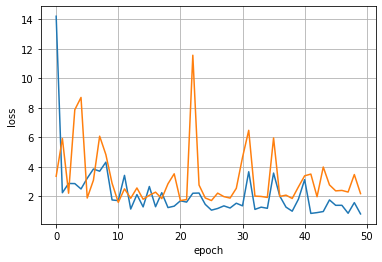

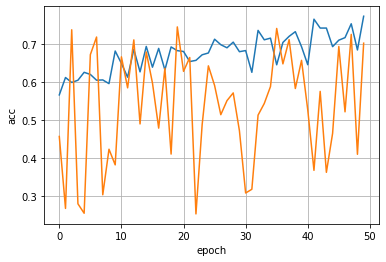

Confusion Matrix:
[[1176  118]
 [ 400   41]]


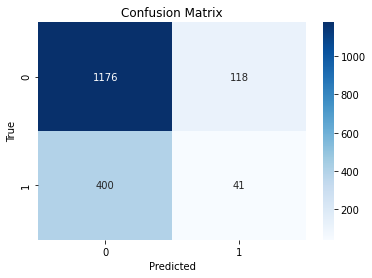

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82      1294
         1.0       0.26      0.09      0.14       441

    accuracy                           0.70      1735
   macro avg       0.50      0.50      0.48      1735
weighted avg       0.62      0.70      0.65      1735



In [8]:
def dataset_read(batch_size,flag,feature=0):
    data_set=myDatasetBinaryPad(0,1)
    train_loader=DataLoader(data_set,batch_size=batch_size,shuffle=True)
    test_set=myDatasetBinaryPad(1,1)
    test_loader=DataLoader(test_set,batch_size=batch_size,shuffle=True)
    return train_loader,test_loader
class mlp(torch.nn.Module):
    def __init__(self,c_out):
        super(mlp, self).__init__()
        self.flatten=torch.nn.Flatten(1)
        self.fc=torch.nn.Linear(13,2048)
        self.fc2=torch.nn.Linear(2048,c_out) 
    def forward(self,x):
        out=self.flatten(x)
        out=torch.relu(self.fc(out))
        out=self.fc2(out)
        return out
c_out=2

epochs=50
batch_size=128

model=mlp(c_out).to(device)
name='bianry_mlp'
train_loader,test_loader=dataset_read(batch_size,flag=0)#1:multiclass,0 binary

train_loss_list,test_loss_list,train_acc_list,test_acc_list,y_pre,y_lab=train(model,epochs,train_loader,test_loader,device)

save_result(name,[train_loss_list,test_loss_list,train_acc_list,test_acc_list,y_pre,y_lab])
plot_epoch(train_loss_list,test_loss_list,train_acc_list,test_acc_list,name)
confusion_matrix_plot_Report(y_lab[-1], y_pre[-1],name)

E:\Hafier\course\Statistical learning\ass\code\dataset.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataBinary=np.array(data)


Train Epoch: 1 cost time: 0.071 train_loss 90.278 accuracy 19.10%
Epoch: 1 cost time: 0.0157 test_loss 69.6686 test accuracy 16.78%
 
Train Epoch: 2 cost time: 0.067 train_loss 34.896 accuracy 25.68%
Epoch: 2 cost time: 0.0064 test_loss 7.3161 test accuracy 31.21%
 
Train Epoch: 3 cost time: 0.056 train_loss 10.664 accuracy 29.78%
Epoch: 3 cost time: 0.0089 test_loss 15.7865 test accuracy 6.04%
 
Train Epoch: 4 cost time: 0.046 train_loss 6.494 accuracy 34.40%
Epoch: 4 cost time: 0.0050 test_loss 11.1258 test accuracy 9.06%
 
Train Epoch: 5 cost time: 0.069 train_loss 5.866 accuracy 37.59%
Epoch: 5 cost time: 0.0041 test_loss 7.2659 test accuracy 18.46%
 
Train Epoch: 6 cost time: 0.041 train_loss 4.289 accuracy 41.50%
Epoch: 6 cost time: 0.0040 test_loss 12.7530 test accuracy 16.11%
 
Train Epoch: 7 cost time: 0.040 train_loss 3.988 accuracy 43.64%
Epoch: 7 cost time: 0.0038 test_loss 4.9154 test accuracy 30.54%
 
Train Epoch: 8 cost time: 0.051 train_loss 4.974 accuracy 41.50%
Epoch:

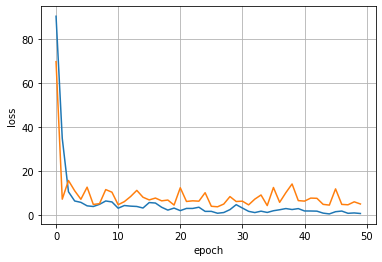

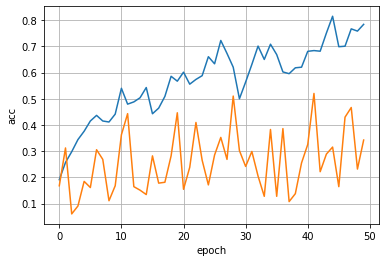

Confusion Matrix:
[[71  6  2 47 33  0]
 [ 1  0  0  0  2  0]
 [22  0  2 11  8  0]
 [15  2  0 24  9  0]
 [ 9  0  1 10  4  0]
 [10  0  0  2  6  1]]


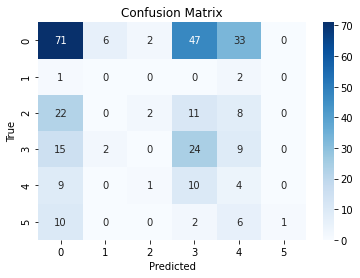

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.45      0.49       159
         1.0       0.00      0.00      0.00         3
         2.0       0.40      0.05      0.08        43
         3.0       0.26      0.48      0.33        50
         4.0       0.06      0.17      0.09        24
         5.0       1.00      0.05      0.10        19

    accuracy                           0.34       298
   macro avg       0.38      0.20      0.18       298
weighted avg       0.47      0.34      0.35       298



In [9]:
def dataset_read(batch_size,flag,feature=0):
    dataset_dic={0:myDatasetBinaryPad,1:myDatasetClassesPad}
    dataset=dataset_dic[flag]
    data_set=dataset(0,1)
    train_loader=DataLoader(data_set,batch_size=batch_size,shuffle=True)
    test_set=dataset(1,1)
    test_loader=DataLoader(test_set,batch_size=batch_size,shuffle=True)
    return train_loader,test_loader
class mlp(torch.nn.Module):
    def __init__(self,c_out):
        super(mlp, self).__init__()
        self.flatten=torch.nn.Flatten(1)
        self.fc=torch.nn.Linear(13,2048)
        self.fc2=torch.nn.Linear(2048,c_out) 
    def forward(self,x):
        out=self.flatten(x)
        out=torch.relu(self.fc(out))
        out=self.fc2(out)
        return out
c_out=6

epochs=50
batch_size=128

model=mlp(c_out).to(device)
name='bianry_mlp'
train_loader,test_loader=dataset_read(batch_size,flag=1)#1:multiclass,0 binary

train_loss_list,test_loss_list,train_acc_list,test_acc_list,y_pre,y_lab=train(model,epochs,train_loader,test_loader,device)

save_result(name,[train_loss_list,test_loss_list,train_acc_list,test_acc_list,y_pre,y_lab])
plot_epoch(train_loss_list,test_loss_list,train_acc_list,test_acc_list,name)
confusion_matrix_plot_Report(y_lab[-1], y_pre[-1],name)